<a href="https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S04_Data_Structures_2/S04_AfterClass_Exercises_DataFrame_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S4 - After-class Exercises: Python Data Structures II and SCM examples (Solution)

---
## Instructions:
Most of the exercises presented here allows you to practice basic Python programming for some applications in Operations Management and Logistics.

For each exercise, you have a code cell for the response underneath it, where you should write your answer between the lines containing `### start your code here ###` and `### end your code here ###`. Your code can contain one or more lines and you can execute this cell in order to complete the exercise. To execute the cell, you can type `Shift+Enter` or press the play button in the toolbar above. Your results will appear right below this response cell.

NOTE: Please pay attention to the variable name of the output you would need to provide under each question. You must use the same variable name for the output so that the result can be printed out correctly.

In session 2, we have defined the following two functions for Bass diffusion model:

<blockquote>
The cumulative number of adoptors (people who bought/adopted the product) $S(t)$ from the beginning (time 0) to time $t$ is described by $S(t) = m\times F(t)$ where $m$ is the market size (the estimated total number of potential customers) and $F(t)$ is the <i>cumulative</i> probability that an individual (potential customer) has already adopted the product by time $t$ (which needs to be calculated). 
We can obtain $F(t)$ as a function of $p$ and $q$ as follows:

$$F(t) = \frac{1-e^{-(p+q)t}}{1+\frac{q}{p}e^{-(p+q)t}} $$

where 
<br /> 
* $p$ is the coefficiant of innovation
<br /> 
* $q$ is the coefficient of imitation
<br /> 

In addition, the probability of adoption by an individual at time $t$ which is represented by $f(t)$ (recall that $f(t) = \frac{d}{dt}F(t)$) can be calculated as follows: 

$$f(t) = \frac{d}{dt}F(t) = \frac{e^{((p+q)t)}p(p+q)^2}{[pe^{((p+q)t)}+q]^2} $$.

</blockquote>

We have then prepared the following two functions to calculate $F(t)$ and $f(t)$.

In [1]:
import math
def Bass_cumulative_probability_Ft(p, q, t):
    return (1-math.exp(-(p+q)*t))/(1+(q/p)*math.exp(-(p+q)*t))

def Bass_probability_ft(p, q, t):
    return (math.exp((p+q)*t)*p*(p+q)**2)/(p*math.exp((p+q)*t)+q)**2

Based on the values of $p$, $q$ and $m$ of the quarterly sales of iPhone provided in the code cell below, please compute the values of the estimated probability of adoption $f(t)$, cumulative probability of adoption $F(t)$, the number of adoptions $s(t)$, and cumulative number of adoptions $S(t)$ for each quarter, which is indexed by $t$. Note that the first column below is an index whereas the subsequent four columns contain the corresponding values of the estimations based on Bass diffusion model.


|Quarter_Index| ft | Ft| st | St | 
| :- | :- | :- | :- | :- | 
|...| ... |...| ... |...|

The parameters $m$, $p$ and $q$ of the Bass model for iPhone were obtained from the paper below (note that we will also review how we can obtain such parameters using the regression later in the course).
> Ashokan, R., Zenarosa, G. L., & He, X. (2018). Diffusion model for the adoption of smartphone brands under competitive pricing. Int. J. Trade Econ. Finan, 9(3), 96-99.

**Question 1**: Please compute the values as indicated in the table above for the first 40 quarters of the sales (i.e., 10 years) using the parameters provided. The index of the quarter must be from $0 \rightarrow 39$ (i.e., the first quarter is considered period $t=0$).

In [2]:
m = 1650.041 # this corresponds to the value 1650.041×10^6, i.e., the market size is 1.65 billion
p = 0.002493
q = 0.132501

In [3]:
import pandas as pd
column_names = ['ft','Ft','st','St']
quarter_index = list(range(40))
bass_df = pd.DataFrame(index = quarter_index, columns = column_names)
bass_df.index.name = 'Quarter'

### start your code here ###
bass_df['ft'] = [Bass_probability_ft(p, q, t) for t in bass_df.index]
bass_df['Ft'] = [Bass_cumulative_probability_Ft(p, q, t) for t in bass_df.index]
bass_df['st'] = [m*bass_df.at[t,'ft'] for t in bass_df.index]
bass_df['St'] = [m*bass_df.at[t,'Ft'] for t in bass_df.index]
### end your code here ###

bass_df

,ft,Ft,st,St
Quarter,,,,
0,0.002493,0.000000,4.113552,0.000000
1,0.002838,0.002662,4.683051,4.392408
2,0.003229,0.005691,5.327380,9.391038
3,0.003670,0.009136,6.055172,15.074982
4,0.004167,0.013050,6.875690,21.532284
5,0.004726,0.017491,7.798768,28.860544
6,0.005354,0.022525,8.834685,37.167431
7,0.006057,0.028224,9.993998,46.571046
8,0.006841,0.034666,11.287286,57.200088



**Question 2**: Please (i) plot the columns `['ft','Ft']` in a single plot using line plot (parameter `kind='line'`) and (ii) plot the columns `['st','St']` in a single plot using bar plot (parameter `kind='bar'`). You can also indicate the plot size using the parameter `figsize = (12,4)`.

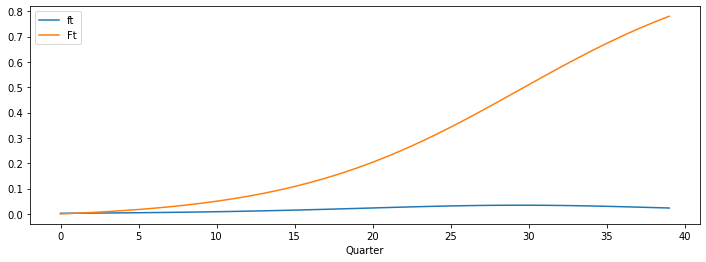

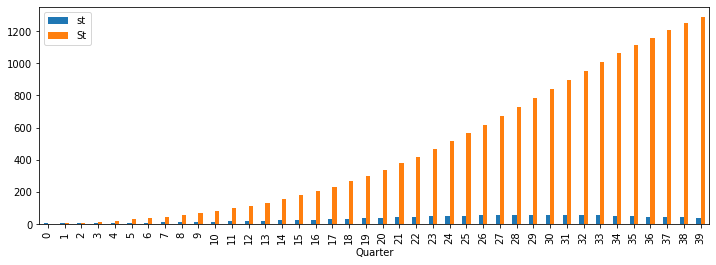

In [4]:
### start your code here ###
bass_df[['ft','Ft']].plot(figsize = (12,4))
bass_df[['st','St']].plot(kind = 'bar', figsize = (12,4))
### end your code here ###

Now we can compare the results with the actual quarterly sales of iPhone for the first 40 quarters (starting from Q2 2007 which the product was first introduced). The data has been made available in the URL below (in csv format) which we can download to DataFrame.

In [5]:
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/S04_Data_Structures_2/iphone_quarter_sales.csv'
actual_sales = pd.read_csv(url, index_col='Quarter')
actual_sales



,Sales
Quarter,
0,0.270
1,1.119
2,2.315
3,1.703
4,0.717
5,6.892
6,4.363
7,3.793
8,5.208


**Question 3**: Please add the following columns and their corresponding values to the `bass_df` DataFrame


*   Column `'Actual'`: which contains the actual sales from the DataFrame `actual_sales`
*   Column `'CumulativeActual'`: which calculates the sum from the first quarter up until each quater in the index
*   Column `'PError'`: which calculates the percentage error of each corresponding quarter from column `'Actual'` and column `'st'` (estimated sales in each quarter), i.e., `PError = (Actual-st)/st`



In [8]:
### start your code here ###
bass_df['Actual'] = actual_sales['Sales']
bass_df['CumulativeActual'] = [sum(actual_sales.loc[:t,'Sales']) for t in actual_sales['Sales'].index]
bass_df['PError'] = (bass_df['Actual'] - bass_df['st'])/bass_df['Actual']
### end your code here ###
bass_df

,ft,Ft,st,St,Actual,CumulativeActual,PError
Quarter,,,,,,,
0,0.002493,0.000000,4.113552,0.000000,0.270,0.270,-14.235379
1,0.002838,0.002662,4.683051,4.392408,1.119,1.389,-3.185032
2,0.003229,0.005691,5.327380,9.391038,2.315,3.704,-1.301244
3,0.003670,0.009136,6.055172,15.074982,1.703,5.407,-2.555591
4,0.004167,0.013050,6.875690,21.532284,0.717,6.124,-8.589526
5,0.004726,0.017491,7.798768,28.860544,6.892,13.016,-0.131568
6,0.005354,0.022525,8.834685,37.167431,4.363,17.379,-1.024911
7,0.006057,0.028224,9.993998,46.571046,3.793,21.172,-1.634853
8,0.006841,0.034666,11.287286,57.200088,5.208,26.380,-1.167298


We can also generate the date of the last day of each quarter using the code below. This list will be later used as new indexes.

In [14]:
quarter_index_date = pd.date_range('4/1/2007', periods=40, freq='Q')
quarter_index_date


DatetimeIndex(['2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30', '2009-12-31', '2010-03-31',
               '2010-06-30', '2010-09-30', '2010-12-31', '2011-03-31',
               '2011-06-30', '2011-09-30', '2011-12-31', '2012-03-31',
               '2012-06-30', '2012-09-30', '2012-12-31', '2013-03-31',
               '2013-06-30', '2013-09-30', '2013-12-31', '2014-03-31',
               '2014-06-30', '2014-09-30', '2014-12-31', '2015-03-31',
               '2015-06-30', '2015-09-30', '2015-12-31', '2016-03-31',
               '2016-06-30', '2016-09-30', '2016-12-31', '2017-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

**Question 4**: Please (i) replace the original indexes using the newly created list 'quarter_index_date' and (ii) then create the following plots from the DataFrame `bass_df` using the size `figsize=(12,4)`:


*   Columns `['St','CumulativeActual']` using a line plot
*   Columns `['st','Actual']` using a line plot
*   Column `['PError']` using a bar plot

**Hint**: you can use the method `.set_index(...)` by calling `bass_df =  bass_df.set_index(new_index_list, index_name)` to set the index (see [link](https://www.w3resource.com/pandas/dataframe/dataframe-set_index.php))



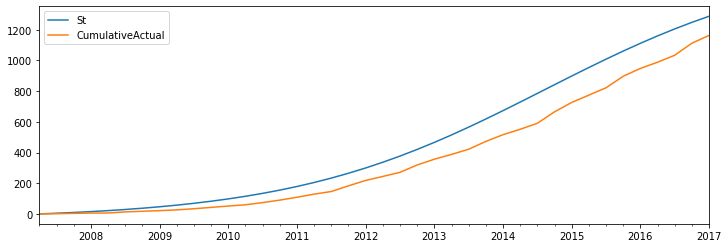

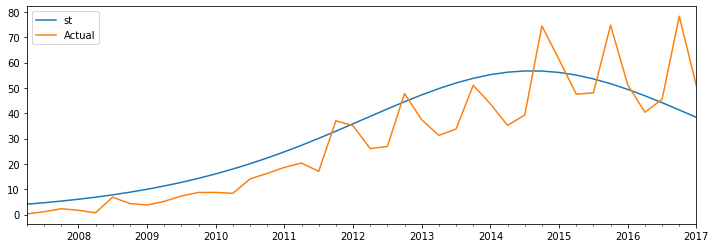

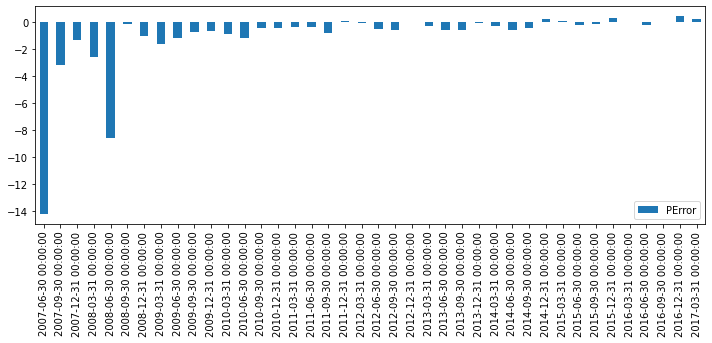

In [16]:
### start your code here ###
bass_df = bass_df.set_index(quarter_index_date, 'Quarter')
bass_df[['St','CumulativeActual']].plot(figsize=(12,4))
bass_df[['st','Actual']].plot(figsize=(12,4))
bass_df[['PError']].plot(kind='bar',figsize=(12,4))
### end your code here ###